## Preparamos entorno

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignorar todos los warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', '{:0,.2f}'.format)

colores_ml = ['#ffe600', '#2d3277', '#2d3277']
def grafico_barra(title='title', xlabel='xlabel', ylabel='ylabel', df=pd.DataFrame, var='var', size=[4,4]):
    conteo = df[f'{var}'].value_counts()

    # Definimos las etiquetas 
    etiquetas = conteo.index.to_numpy()
   
    colores_ml = ['#ffe600', '#2d3277', '#2d3277']  


    # Creamos la figura y el eje
    fig, ax = plt.subplots(figsize=(size[0], size[0]))

    # Generamos las barras
    barras = ax.bar(etiquetas, conteo.values, color=colores_ml)

    # Personalizamos el aspecto del gráfico
    ax.set_title(f'{title}', fontsize=12, color='dimgray')
    ax.set_xlabel(f'{xlabel}', fontsize=10, color='dimgray')
    ax.set_ylabel(f'{ylabel}', fontsize=10, color='dimgray')
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    for barra in barras:
        barra.set_alpha(0.8)
        barra.set_edgecolor('black')

    plt.tight_layout() 
    plt.show()



### Base de Datos

In [2]:
df = pd.read_csv('archivos_ml/ofertas_relampago.csv')

print(df.shape)
df.head(1)

(48746, 13)


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.00,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER_START_DATE           48746 non-null  object 
 1   OFFER_START_DTTM           48746 non-null  object 
 2   OFFER_FINISH_DTTM          48746 non-null  object 
 3   OFFER_TYPE                 48746 non-null  object 
 4   INVOLVED_STOCK             48746 non-null  int64  
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64  
 6   SOLD_AMOUNT                24579 non-null  float64
 7   SOLD_QUANTITY              24579 non-null  float64
 8   ORIGIN                     11316 non-null  object 
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object 
 10  DOM_DOMAIN_AGG1            48746 non-null  object 
 11  VERTICAL                   48746 non-null  object 
 12  DOMAIN_ID                  48746 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usag

In [7]:
df['OFFER_START_DATE'] = pd.to_datetime(df['OFFER_START_DATE'])
df['OFFER_START_DTTM'] = pd.to_datetime(df['OFFER_START_DTTM'])
df['OFFER_FINISH_DTTM'] = pd.to_datetime(df['OFFER_FINISH_DTTM'])
df['time_lapse'] = df['OFFER_FINISH_DTTM'] - df['OFFER_START_DTTM']
df['periodo'] = df['OFFER_START_DATE'].dt.to_period('M')
df['REMAINING_STOCK_AFTER_END_corregido'] = df['INVOLVED_STOCK'] - df['SOLD_QUANTITY']
df['SOLD_QUANTITY_corregido'] = (df['REMAINING_STOCK_AFTER_END'] - df['INVOLVED_STOCK'])*-1
df['sold_total_amount'] = df['SOLD_QUANTITY']*df['SOLD_AMOUNT']
df['time_lapse_en_segundos'] = df['time_lapse'].dt.total_seconds()
df['time_lapse_promedio'] = df['time_lapse_en_segundos'] / df['SOLD_QUANTITY']
df['total_amount_per_second'] = df['sold_total_amount'] / df['time_lapse_en_segundos']

In [8]:
df.head(1)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,...,VERTICAL,DOMAIN_ID,time_lapse,periodo,REMAINING_STOCK_AFTER_END_corregido,SOLD_QUANTITY_corregido,sold_total_amount,time_lapse_promedio,time_lapse_en_segundos,total_amount_per_second
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.00,A,none,...,CPG,MLM-BIRD_FOODS,0 days 07:02:43,2021-06,-2.00,6,28.32,"4,227.17","25,363.00",0.00


## Entendimiento y control de DF

In [9]:
## periodo de analisis
df['periodo'].value_counts(),df['periodo'].value_counts(1)

(periodo
 2021-07    30410
 2021-06    18336
 Freq: M, Name: count, dtype: int64,
 periodo
 2021-07   0.62
 2021-06   0.38
 Freq: M, Name: proportion, dtype: float64)

In [10]:
## no hay registros con la fecha de inicio de la oferta fuera al periodo analisado (consistencia de la informacion)
print(df[df['OFFER_START_DTTM']>='2021/08/01'].shape)
print(df[df['OFFER_START_DTTM']<'2021/06/01'].shape)

(0, 21)
(0, 21)


In [11]:
df['time_lapse'].dt.floor('H').value_counts(0).sort_index()

time_lapse
0 days 00:00:00     4101
0 days 01:00:00      474
0 days 02:00:00      679
0 days 03:00:00      799
0 days 04:00:00      957
0 days 05:00:00     1419
0 days 06:00:00    30419
0 days 07:00:00     2013
0 days 08:00:00     7698
0 days 09:00:00        3
0 days 10:00:00        4
0 days 11:00:00        5
0 days 12:00:00      170
0 days 14:00:00        3
0 days 15:00:00        1
4 days 08:00:00        1
Name: count, dtype: int64

In [12]:
### revisamos los valores extremos (las ofertas con mayor tiempo de exposicion)
df.sort_values(by='time_lapse').tail()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,...,VERTICAL,DOMAIN_ID,time_lapse,periodo,REMAINING_STOCK_AFTER_END_corregido,SOLD_QUANTITY_corregido,sold_total_amount,time_lapse_promedio,time_lapse_en_segundos,total_amount_per_second
28519,2021-07-21,2021-07-21 19:00:00+00:00,2021-07-22 09:37:11+00:00,lightning_deal,5,5,NaN,NaN,A,free_shipping,...,CE,MLM-AIR_PURIFIERS,0 days 14:37:11,2021-07,NaN,0,NaN,NaN,"52,631.00",NaN
28540,2021-07-21,2021-07-21 19:00:00+00:00,2021-07-22 09:37:47+00:00,lightning_deal,15,9,25.92,6.00,A,none,...,BEAUTY & HEALTH,MLM-ANTIBACTERIAL_GELS,0 days 14:37:47,2021-07,9.00,6,155.52,"8,777.83","52,667.00",0.00
28556,2021-07-21,2021-07-21 19:00:00+00:00,2021-07-22 09:40:07+00:00,lightning_deal,10,9,4.88,1.00,A,free_shipping,...,CPG,MLM-HAIR_SHAMPOOS_AND_CONDITIONERS,0 days 14:40:07,2021-07,9.00,1,4.88,"52,807.00","52,807.00",0.00
28642,2021-07-21,2021-07-21 18:00:00+00:00,2021-07-22 09:37:09+00:00,lightning_deal,100,100,NaN,NaN,A,free_shipping,...,CE,MLM-TABLETS,0 days 15:37:09,2021-07,NaN,0,NaN,NaN,"56,229.00",NaN
42018,2021-06-05,2021-06-05 13:00:00+00:00,2021-06-09 21:45:09+00:00,lightning_deal,5,5,NaN,NaN,NaN,none,...,APP & SPORTS,MLM-SLEEPING_MASKS,4 days 08:45:09,2021-06,NaN,0,NaN,NaN,"377,109.00",NaN


In [13]:
df.isnull().sum()

OFFER_START_DATE                           0
OFFER_START_DTTM                           0
OFFER_FINISH_DTTM                          0
OFFER_TYPE                                 0
INVOLVED_STOCK                             0
REMAINING_STOCK_AFTER_END                  0
SOLD_AMOUNT                            24167
SOLD_QUANTITY                          24167
ORIGIN                                 37430
SHIPPING_PAYMENT_TYPE                      0
DOM_DOMAIN_AGG1                            0
VERTICAL                                   0
DOMAIN_ID                                  0
time_lapse                                 0
periodo                                    0
REMAINING_STOCK_AFTER_END_corregido    24167
SOLD_QUANTITY_corregido                    0
sold_total_amount                      24167
time_lapse_promedio                    24167
time_lapse_en_segundos                     0
total_amount_per_second                24167
dtype: int64

In [ ]:
### revision de si los nulos de monto de venta esta asociado a los time_lapse extremadamente cortos
# df[df['SOLD_AMOUNT'].isna()]['time_lapse'].dt.floor('H').value_counts().sort_index()

In [14]:
df['OFFER_TYPE'].value_counts() ### todas las ofertas relampagos estan cerradas

OFFER_TYPE
lightning_deal    48746
Name: count, dtype: int64

In [15]:
df['INVOLVED_STOCK'].describe() ### no hay ningun articulo con stock inicial negativo (consistencia)

count   48,746.00
mean        35.01
std        206.76
min          1.00
25%          5.00
50%         10.00
75%         15.00
max      9,000.00
Name: INVOLVED_STOCK, dtype: float64

In [16]:
df['REMAINING_STOCK_AFTER_END'].describe() ### hay valores negativos en el stock final (posible inconsistencia)

count   48,746.00
mean        30.57
std        195.81
min       -192.00
25%          4.00
50%          8.00
75%         15.00
max      8,635.00
Name: REMAINING_STOCK_AFTER_END, dtype: float64

In [17]:
df[df['REMAINING_STOCK_AFTER_END']<0].shape ### Cantidad de registros inconsistentes de stock final

(1273, 21)

In [18]:
df[df['REMAINING_STOCK_AFTER_END']<0].head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,...,VERTICAL,DOMAIN_ID,time_lapse,periodo,REMAINING_STOCK_AFTER_END_corregido,SOLD_QUANTITY_corregido,sold_total_amount,time_lapse_promedio,time_lapse_en_segundos,total_amount_per_second
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.00,A,none,...,CPG,MLM-BIRD_FOODS,0 days 07:02:43,2021-06,-2.00,6,28.32,"4,227.17","25,363.00",0.00
7,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:39+00:00,lightning_deal,10,-1,103.03,11.00,NaN,free_shipping,...,CE,MLM-HEADPHONES,0 days 04:05:39,2021-06,-1.00,11,"1,133.33","1,339.91","14,739.00",0.08
8,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:32+00:00,lightning_deal,10,-1,NaN,NaN,NaN,free_shipping,...,CE,MLM-HEADPHONES,0 days 04:05:32,2021-06,NaN,11,NaN,NaN,"14,732.00",NaN
29,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 14:20:21+00:00,lightning_deal,5,-4,12.18,9.00,NaN,none,...,HOME & INDUSTRY,MLM-SOAP_AND_DETERGENT_DISPENSERS,0 days 01:20:21,2021-06,-4.00,9,109.62,535.67,"4,821.00",0.02
77,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 18:42:19+00:00,lightning_deal,8,-1,12.61,9.00,A,none,...,CPG,MLM-CATS_AND_DOGS_FOODS,0 days 02:42:19,2021-06,-1.00,9,113.49,"1,082.11","9,739.00",0.01


In [19]:
df['SOLD_QUANTITY'].describe() ### 

count   24,579.00
mean        10.85
std         45.48
min          1.00
25%          1.00
50%          3.00
75%          6.00
max      1,646.00
Name: SOLD_QUANTITY, dtype: float64

In [48]:
df['SOLD_AMOUNT'].describe() ### 

count   24,579.00
mean        51.21
std        175.25
min          0.28
25%          5.73
50%         12.42
75%         30.93
max      4,836.57
Name: SOLD_AMOUNT, dtype: float64

In [49]:
df[(df['SOLD_AMOUNT'] > 4000)].head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,...,VERTICAL,DOMAIN_ID,time_lapse,periodo,REMAINING_STOCK_AFTER_END_corregido,SOLD_QUANTITY_corregido,sold_total_amount,time_lapse_promedio,time_lapse_en_segundos,total_amount_per_second
11449,2021-07-27,2021-07-27 09:00:00+00:00,2021-07-27 17:01:05+00:00,lightning_deal,2000,497,"4,836.57","1,503.00",A,none,...,BEAUTY & HEALTH,MLM-DISPOSABLE_GLOVES,0 days 08:01:05,2021-07,497.00,1503,"7,269,364.71",19.20,"28,865.00",251.84
13737,2021-07-19,2021-07-19 13:00:00+00:00,2021-07-19 21:00:55+00:00,lightning_deal,4000,2358,"4,570.31","1,646.00",A,none,...,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS,0 days 08:00:55,2021-07,"2,354.00",1642,"7,522,730.26",17.53,"28,855.00",260.71
37095,2021-06-18,2021-06-18 15:00:00+00:00,2021-06-18 23:00:00+00:00,lightning_deal,100,45,"4,678.68",75.00,A,free_shipping,...,CE,MLM-CELLPHONES,0 days 08:00:00,2021-06,25.00,55,"350,901.00",384.00,"28,800.00",12.18
45804,2021-07-26,2021-07-26 17:00:00+00:00,2021-07-27 01:00:05+00:00,lightning_deal,2000,1931,"4,264.51",67.00,A,free_shipping,...,CE,MLM-CELLPHONES,0 days 08:00:05,2021-07,"1,933.00",69,"285,722.17",429.93,"28,805.00",9.92


In [20]:
print(df[(df['SOLD_AMOUNT'].isna()) & (df['SOLD_QUANTITY_corregido'] == 0)].shape)
print(df[(df['SOLD_AMOUNT'].isna()) & (df['SOLD_QUANTITY_corregido'] != 0)].shape)

(23579, 21)
(588, 21)


In [21]:
df[(df['SOLD_AMOUNT'].isna()) & (df['SOLD_QUANTITY_corregido'] != 0)]['time_lapse'].dt.floor('H').value_counts().sort_index()

time_lapse
0 days 00:00:00     11
0 days 01:00:00     12
0 days 02:00:00     41
0 days 03:00:00     38
0 days 04:00:00     25
0 days 05:00:00     25
0 days 06:00:00    225
0 days 07:00:00     24
0 days 08:00:00    186
0 days 11:00:00      1
Name: count, dtype: int64

In [22]:
df['REMAINING_STOCK_AFTER_END_corregido'].describe()

count   24,579.00
mean        42.81
std        263.75
min       -482.00
25%          3.00
50%          7.00
75%         13.00
max      8,634.00
Name: REMAINING_STOCK_AFTER_END_corregido, dtype: float64

In [23]:
df[df['REMAINING_STOCK_AFTER_END_corregido'] != df['REMAINING_STOCK_AFTER_END']].tail()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,...,VERTICAL,DOMAIN_ID,time_lapse,periodo,REMAINING_STOCK_AFTER_END_corregido,SOLD_QUANTITY_corregido,sold_total_amount,time_lapse_promedio,time_lapse_en_segundos,total_amount_per_second
48738,2021-06-19,2021-06-19 15:00:00+00:00,2021-06-19 23:00:01+00:00,lightning_deal,10,10,NaN,NaN,A,free_shipping,...,CE,MLM-TELEPHONES,0 days 08:00:01,2021-06,NaN,0,NaN,NaN,"28,801.00",NaN
48739,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 21:00:00+00:00,lightning_deal,30,30,NaN,NaN,A,none,...,HOME & INDUSTRY,MLM-MIRRORS,0 days 08:00:00,2021-06,NaN,0,NaN,NaN,"28,800.00",NaN
48740,2021-06-19,2021-06-19 07:00:00+00:00,2021-06-19 13:00:02+00:00,lightning_deal,15,15,21.23,2.00,NaN,free_shipping,...,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS,0 days 06:00:02,2021-06,13.00,0,42.46,"10,801.00","21,602.00",0.00
48742,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,...,HOME & INDUSTRY,MLM-DECORATIVE_PAINTINGS,0 days 06:00:01,2021-06,NaN,0,NaN,NaN,"21,601.00",NaN
48745,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:00+00:00,lightning_deal,15,15,NaN,NaN,NaN,free_shipping,...,HOME & INDUSTRY,MLM-BED_SHEETS,0 days 06:00:00,2021-06,NaN,0,NaN,NaN,"21,600.00",NaN


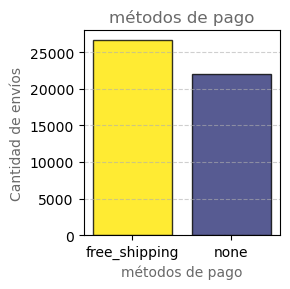

In [24]:
grafico_barra(title='métodos de pago', 
              xlabel='métodos de pago', 
              ylabel='Cantidad de envíos', 
              df=df, var='SHIPPING_PAYMENT_TYPE',
              size=[3,3])

In [25]:
df.DOM_DOMAIN_AGG1.value_counts()

DOM_DOMAIN_AGG1
HOME&DECOR                      6742
APPAREL ACCESORIES              4387
APPAREL                         3856
COMPUTERS                       3770
SPORTS                          3289
PHARMACEUTICS                   3035
ELECTRONICS                     3018
PERSONAL CARE                   3016
MOBILE                          1841
AUTOPARTS                       1696
FOOTWEAR                        1516
TOOLS AND CONSTRUCTION          1491
TOYS AND GAMES                  1426
STATIONARY                      1259
INDUSTRY                        1199
BEAUTY EQUIPMENT                1099
FOODS                            858
PERSONAL HYGIENE                 840
BABY                             801
MOTOPARTS                        641
BOOKS, MULTIMEDIA & OTHER E!     498
PETS FOOD                        487
PARTY                            397
CLEANING                         360
SECURITY                         320
PET PRODUCTS                     257
SUPLEMENTS            

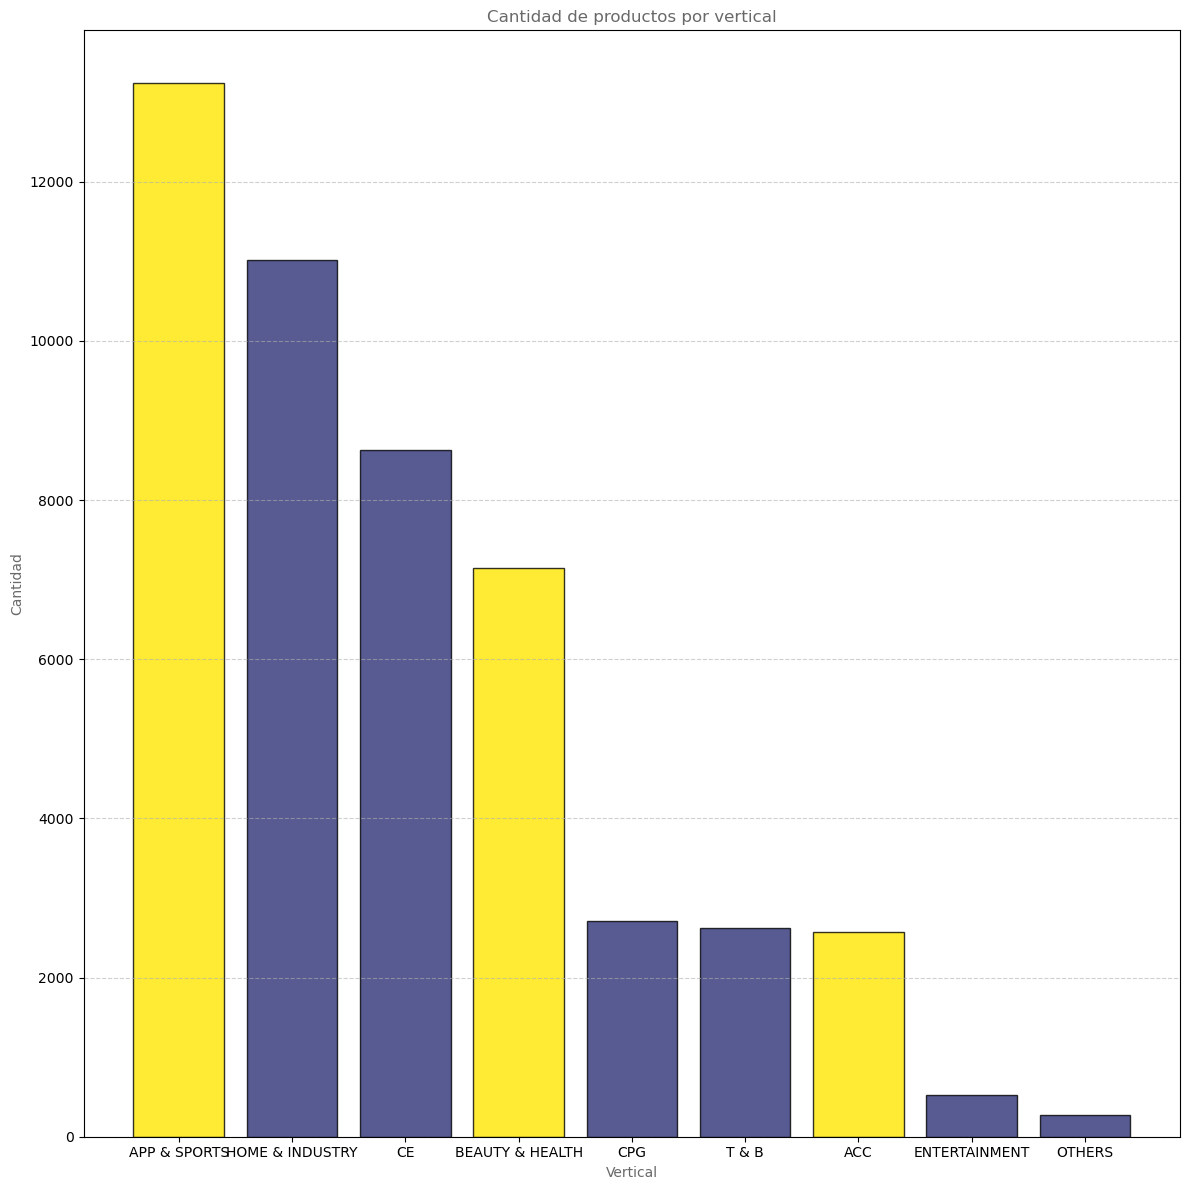

In [27]:
grafico_barra(title='Cantidad de productos por vertical', 
              xlabel='Vertical', 
              ylabel='Cantidad', 
              df=df, var='VERTICAL',
              size=[12,12])

In [28]:
df.DOMAIN_ID.value_counts()

DOMAIN_ID
MLM-SURGICAL_AND_INDUSTRIAL_MASKS            1759
MLM-HEADPHONES                                761
MLM-LED_STRIPS                                518
MLM-SUNGLASSES                                472
MLM-VEHICLE_LED_BULBS                         454
                                             ... 
MLM-INSECT_KILLER_LIGHTS                        1
MLM-WATERING_CANS                               1
MLM-BASEBALL_AND_SOFTBALL_FIELDING_GLOVES       1
MLM-HABERDASHERY_BEADS                          1
MLM-ELECTRIC_SANDWICH_MAKERS                    1
Name: count, Length: 1266, dtype: int64

In [29]:
df.ORIGIN.value_counts()

ORIGIN
A    11316
Name: count, dtype: int64

In [30]:
### revision de si los nulos de monto de venta esta asociado a los time_lapse cortos
df[df['ORIGIN'].isna()]['time_lapse'].dt.floor('H').value_counts(0).sort_index()

time_lapse
0 days 00:00:00     3672
0 days 01:00:00      396
0 days 02:00:00      553
0 days 03:00:00      689
0 days 04:00:00      844
0 days 05:00:00     1011
0 days 06:00:00    30094
0 days 12:00:00      170
4 days 08:00:00        1
Name: count, dtype: int64

In [33]:
df_totales = df.pivot_table(index='VERTICAL', values=['SOLD_QUANTITY', 'SOLD_AMOUNT', 'sold_total_amount','time_lapse_promedio','total_amount_per_second'], aggfunc=np.sum).reset_index()
df_totales_1 = df.pivot_table(index='VERTICAL', values=['SOLD_QUANTITY', 'SOLD_AMOUNT', 'sold_total_amount','time_lapse_promedio','total_amount_per_second'], aggfunc=np.mean).reset_index()
df_totales_1.columns = ['VERTICAL','SOLD_QUANTITY_avg', 'SOLD_AMOUNT_avg', 'sold_total_amount_avg','time_lapse_promedio_avg','total_amount_per_second_avg']


df_totales =  df_totales.merge(df_totales_1)
df_totales.sort_values(by='sold_total_amount', ascending=False )

,VERTICAL,SOLD_AMOUNT,SOLD_QUANTITY,sold_total_amount,time_lapse_promedio,total_amount_per_second,SOLD_QUANTITY_avg,SOLD_AMOUNT_avg,sold_total_amount_avg,time_lapse_promedio_avg,total_amount_per_second_avg
2,BEAUTY & HEALTH,"547,427.27","178,141.00","141,652,152.96","33,167,645.63","5,840.09",123.63,40.23,"31,990.10","7,490.43",1.32
3,CE,"362,787.94","21,833.00","6,108,965.00","50,016,647.56",280.20,80.10,4.82,"1,348.86","11,043.64",0.06
6,HOME & INDUSTRY,"155,518.68","27,161.00","2,245,322.23","58,234,316.02",110.98,28.91,5.05,417.42,"10,826.23",0.02
1,APP & SPORTS,"131,101.36","25,658.00","2,112,125.21","78,818,047.40",109.47,19.72,3.86,317.66,"11,854.12",0.02
0,ACC,"26,819.98","5,156.00","168,161.87","14,339,022.80",11.19,20.49,3.94,128.47,"10,954.18",0.01
4,CPG,"16,787.68","5,696.00","150,037.07","13,733,082.39",9.50,13.91,4.72,124.31,"11,377.86",0.01
8,T & B,"14,302.78","2,349.00","62,514.50","11,218,183.38",5.68,18.31,3.01,80.04,"14,363.87",0.01
7,OTHERS,"1,929.24",357.00,"9,207.23","1,652,870.81",0.47,16.21,3.00,77.37,"13,889.67",0.00
5,ENTERTAINMENT,"1,988.57",357.00,"5,853.80","2,845,653.30",0.30,11.17,2.01,32.89,"15,986.82",0.00


In [34]:
df_totales = df.pivot_table(index='DOM_DOMAIN_AGG1', values=['SOLD_QUANTITY', 'SOLD_AMOUNT', 'sold_total_amount','time_lapse_promedio','total_amount_per_second'], aggfunc=np.sum).reset_index()
df_totales_1 = df.pivot_table(index='DOM_DOMAIN_AGG1', values=['SOLD_QUANTITY', 'SOLD_AMOUNT', 'sold_total_amount','time_lapse_promedio','total_amount_per_second'], aggfunc=np.mean).reset_index()
df_totales_1.columns = ['DOM_DOMAIN_AGG1','SOLD_QUANTITY_avg', 'SOLD_AMOUNT_avg', 'sold_total_amount_avg','time_lapse_promedio_avg','total_amount_per_second_avg']

df_totales =  df_totales.merge(df_totales_1)
df_totales.sort_values(by='sold_total_amount', ascending=False )

,DOM_DOMAIN_AGG1,SOLD_AMOUNT,SOLD_QUANTITY,sold_total_amount,time_lapse_promedio,total_amount_per_second,SOLD_QUANTITY_avg,SOLD_AMOUNT_avg,sold_total_amount_avg,time_lapse_promedio_avg,total_amount_per_second_avg
26,PHARMACEUTICS,"440,216.74","147,697.00","119,245,474.81","10,202,026.84","4,875.02",199.74,67.01,"54,104.12","4,628.87",2.21
7,BEAUTY EQUIPMENT,"88,830.25","24,300.00","22,278,243.23","5,574,167.07",956.93,128.55,35.17,"32,240.58","8,066.81",1.38
17,MOBILE,"158,992.21","5,511.00","3,961,639.45","11,398,586.77",166.26,152.58,5.29,"3,801.96","10,939.14",0.16
12,ELECTRONICS,"119,853.95","5,157.00","1,188,791.40","17,302,307.76",51.17,87.55,3.77,868.36,"12,638.65",0.04
15,HOME&DECOR,"87,761.65","18,269.00","1,003,759.34","35,548,744.06",57.29,25.74,5.36,294.36,"10,424.85",0.02
2,APPAREL,"36,569.90","7,845.00","981,617.98","24,620,768.22",37.55,18.42,3.95,494.52,"12,403.41",0.02
10,COMPUTERS,"83,941.78","11,165.00","958,534.15","21,315,753.03",62.78,39.63,5.27,452.57,"10,064.09",0.03
16,INDUSTRY,"25,874.22","2,831.00","874,515.15","5,656,318.78",34.26,49.66,5.43,"1,678.53","10,856.66",0.07
3,APPAREL ACCESORIES,"36,565.63","7,654.00","691,077.80","25,164,000.80",38.05,17.35,3.63,327.99,"11,943.05",0.02
28,SPORTS,"33,118.70","7,626.00","314,076.24","18,295,599.17",26.56,19.48,4.49,184.75,"10,762.12",0.02


In [36]:
df_totales = df.pivot_table(index='DOMAIN_ID', values=['SOLD_QUANTITY', 'SOLD_AMOUNT', 'sold_total_amount','time_lapse_promedio','total_amount_per_second'], aggfunc=np.sum).reset_index()
df_totales_1 = df.pivot_table(index='DOMAIN_ID', values=['SOLD_QUANTITY', 'SOLD_AMOUNT', 'sold_total_amount','time_lapse_promedio','total_amount_per_second'], aggfunc=np.mean).reset_index()
df_totales_1.columns = ['DOMAIN_ID','SOLD_QUANTITY_avg', 'SOLD_AMOUNT_avg', 'sold_total_amount_avg','time_lapse_promedio_avg','total_amount_per_second_avg']

df_totales =  df_totales.merge(df_totales_1)
df_totales.sort_values(by='total_amount_per_second_avg', ascending=False ).head()

,DOMAIN_ID,SOLD_AMOUNT,SOLD_QUANTITY,sold_total_amount,time_lapse_promedio,total_amount_per_second,SOLD_QUANTITY_avg,SOLD_AMOUNT_avg,sold_total_amount_avg,time_lapse_promedio_avg,total_amount_per_second_avg
261,MLM-DISPOSABLE_GLOVES,"55,365.39","13,477.00","16,924,732.32","583,884.55",765.07,374.09,91.06,"114,356.30","3,945.17",5.17
150,MLM-CARD_PAYMENT_TERMINALS,"7,465.46",715.00,"751,073.14","2,435.47",26.59,"1,244.24",119.17,"125,178.86",405.91,4.43
786,MLM-SURGICAL_AND_INDUSTRIAL_MASKS,"410,363.30","141,369.00","116,454,331.01","3,613,120.41","4,772.78",260.88,89.87,"74,033.27","2,296.96",3.03
616,MLM-OXIMETERS,"17,606.61","8,632.00","5,207,688.67","557,666.59",184.89,149.21,73.15,"44,132.95","4,725.99",1.57
165,MLM-CELLPHONES,"111,678.79","1,769.00","3,181,374.22","1,268,093.45",133.99,729.93,11.56,"20,793.30","8,288.19",0.88


In [37]:
df.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,...,VERTICAL,DOMAIN_ID,time_lapse,periodo,REMAINING_STOCK_AFTER_END_corregido,SOLD_QUANTITY_corregido,sold_total_amount,time_lapse_promedio,time_lapse_en_segundos,total_amount_per_second
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.00,A,none,...,CPG,MLM-BIRD_FOODS,0 days 07:02:43,2021-06,-2.00,6,28.32,"4,227.17","25,363.00",0.00
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,...,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS,0 days 06:00:02,2021-06,NaN,0,NaN,NaN,"21,602.00",NaN
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.00,NaN,none,...,CE,MLM-SPEAKERS,0 days 06:00:01,2021-06,12.00,3,32.19,"7,200.33","21,601.00",0.00
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.00,NaN,none,...,CE,MLM-HEADPHONES,0 days 06:36:12,2021-06,13.00,2,14.06,"11,886.00","23,772.00",0.00
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.00,NaN,none,...,CE,MLM-HEADPHONES,0 days 02:48:12,2021-06,0.00,15,594.75,672.80,"10,092.00",0.06


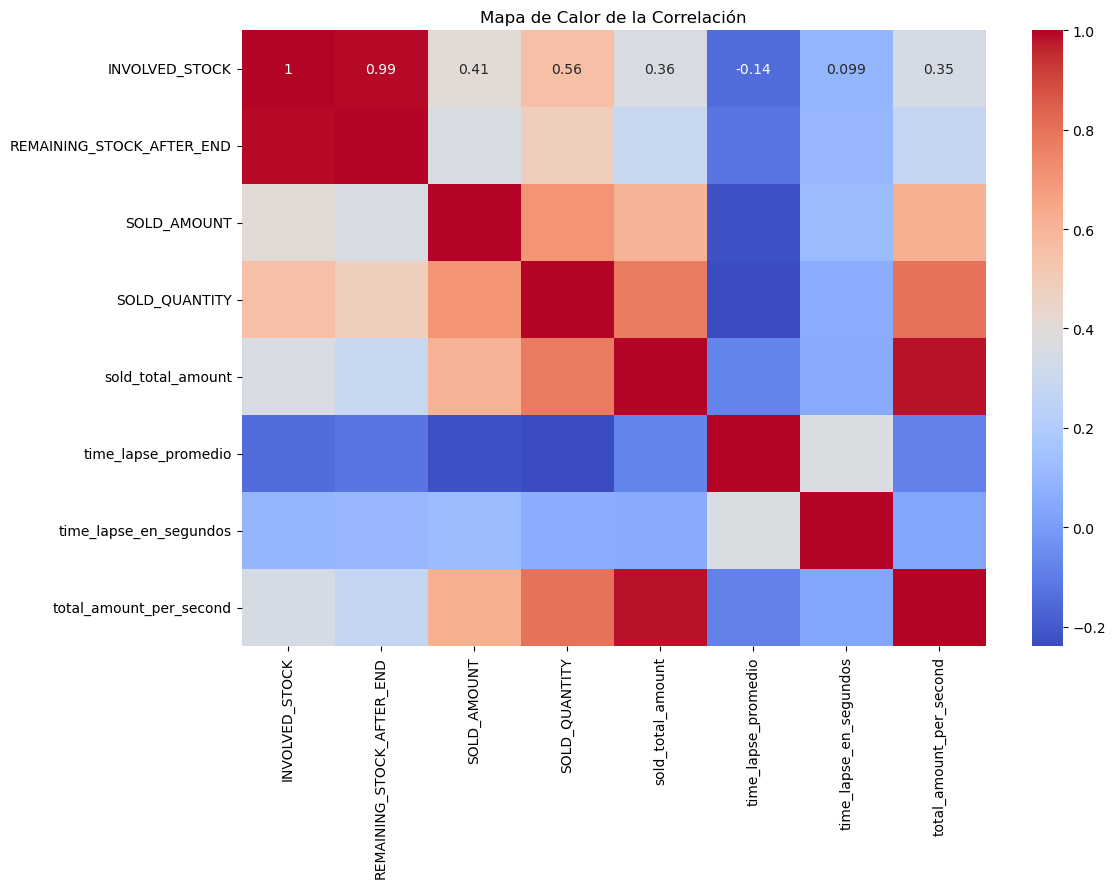

In [43]:
# Visualización de correlaciones
corr_matrix = df[['INVOLVED_STOCK','REMAINING_STOCK_AFTER_END','SOLD_AMOUNT','SOLD_QUANTITY','sold_total_amount','time_lapse_promedio','time_lapse_en_segundos','total_amount_per_second']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de la Correlación')
plt.show()

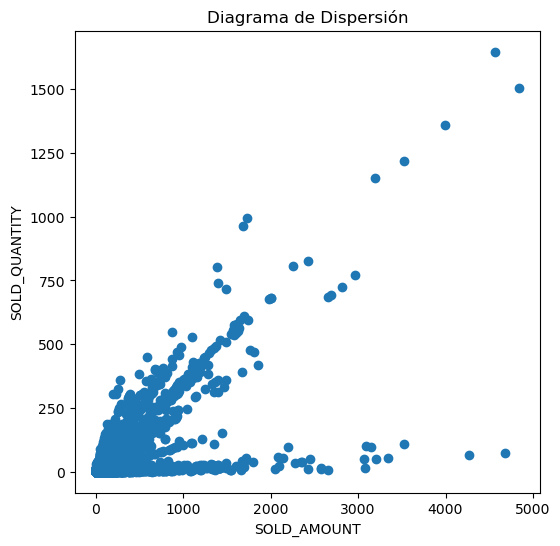

In [54]:
# Crea el diagrama de dispersión
plt.figure(figsize=(6, 6))
plt.scatter(df['SOLD_AMOUNT'], df['SOLD_QUANTITY']) # Se utiliza la misma variable para ambos ejes

# Agrega etiquetas y título al gráfico
plt.xlabel('SOLD_AMOUNT')
plt.ylabel('SOLD_QUANTITY')
plt.title('Diagrama de Dispersión')

# Muestra el diagrama
plt.show()

# Conclusiones

#### - hay una oferta que tiene una duracion de 4 dias (habria que evaluarla con mas atencion) luego de las 8 horas de time_lapse podria considerarse valores extremos.
#### - mas alla del periodo donde observamos los datos es un claro momento de pandemia, por los tipos de productos mas vendidos (mascaras, guantes desechables, oximetros y productos farmaceuticos)
#### - el producto que mas reales (estimo que son reales) genero por segundo fueron los guantes descartables 5.17 reales por segundo de oferta, 
#### - la vertical que mas productos vendio por medio de las ofertas relanpago fueron BEAUTY & HEALTH con 141 millones y 178.000 articulos vendidos, obteniendo una gran ventaja sobre los otros rubros.
#### - a niveles estadisticos, podria sugerir que imputar los nulos a 0 en las 2 variables numericas que continen nulos (SOLD_AMOUNT,SOLD_QUANTITY ), parece ser la mejor opcion.
#### - hay unos 1273 registros con incongruencias en el stock final, presenta valores negativos. habria que investigar un poco mas ese tema.

